## Assignment is below at the bottom

Video 13.1
https://www.youtube.com/watch?v=kIGHE7Cfe1s

Video 13.2
https://www.youtube.com/watch?v=Rm9bJcDd1KU

Video 13.3
https://youtu.be/6HjZk-3LsjE

In [11]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

from keras.callbacks import TensorBoard
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

((60000, 784), (10000, 784))

In [12]:
# this is the size of our encoded representations
encoding_dim = 4  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [13]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [14]:
autoencoder.fit(xtrain, xtrain,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest),
                callbacks=[TensorBoard(log_dir='/tmp/auto')])

Epoch 1/50
  1/235 [..............................] - ETA: 1:12 - loss: 0.6930

2022-11-19 18:15:27.757422: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 0.2526

2022-11-19 18:15:29.959634: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 3s 10ms/step - loss: 0.2526 - val_loss: 0.2012
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1941 - val_loss: 0.1884
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1854 - val_loss: 0.1813
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1793 - val_loss: 0.1763
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1750 - val_loss: 0.1727
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1719 - val_loss: 0.1703
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1696 - val_loss: 0.1690
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1678 - val_loss: 0.1670
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1662 - val_loss: 0.1660
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1650 - val_loss: 0.1649
Epoch 11/

In [22]:
encoded_imgs

array([[ 7.6594334 , 37.47538   ,  0.        ,  9.504147  ],
       [34.549664  , 13.835002  ,  0.        , 13.747142  ],
       [67.74897   , 48.452415  ,  0.        , 26.439318  ],
       ...,
       [11.790174  , 21.768717  ,  0.        ,  7.6855597 ],
       [12.447085  , 10.563789  ,  0.        ,  0.52747333],
       [21.274275  , 18.577665  ,  0.        , 33.929012  ]],
      dtype=float32)

In [28]:
noise = np.random.normal(20,4, (4,4))
noise_preds = decoder.predict(noise)

1/1 [==============================] - 0s 19ms/step


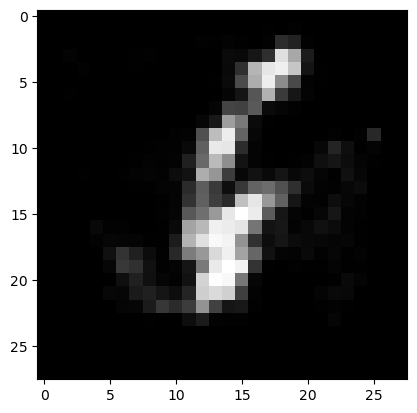

In [30]:
plt.imshow(noise_preds[2].reshape(28,28))

In [23]:
np.max(encoded_imgs)

106.08684

114/313 [=========>....................] - ETA: 0s

2022-11-19 18:17:12.053037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


109/313 [=========>....................] - ETA: 0s

2022-11-19 18:17:12.623956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step


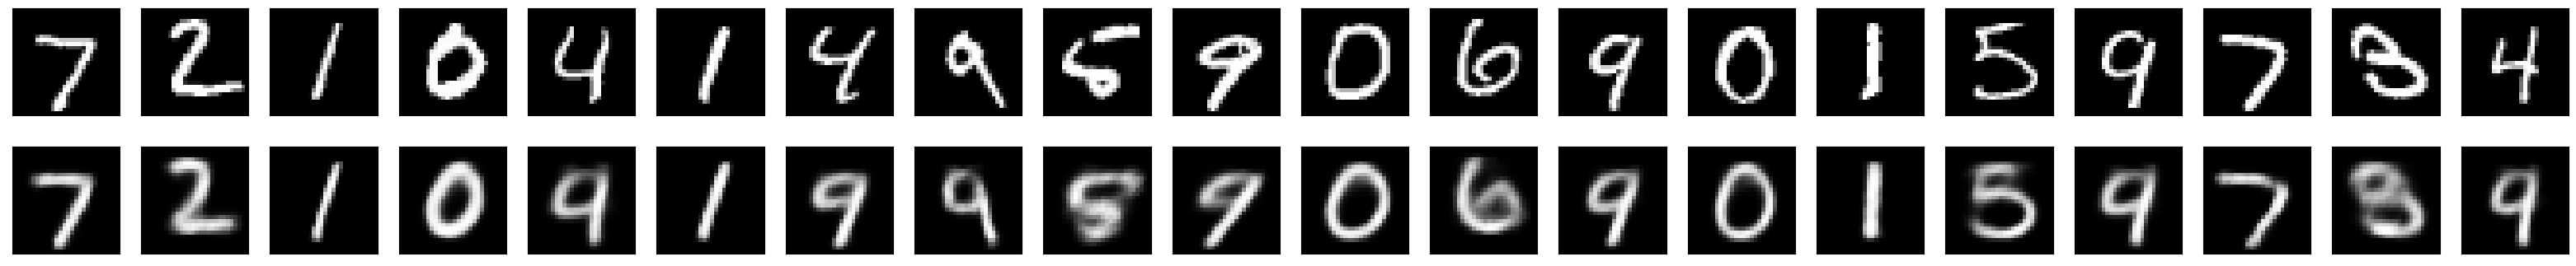

In [15]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [16]:
encoded_imgs

array([[ 7.6594334 , 37.47538   ,  0.        ,  9.504147  ],
       [34.549664  , 13.835002  ,  0.        , 13.747142  ],
       [67.74897   , 48.452415  ,  0.        , 26.439318  ],
       ...,
       [11.790174  , 21.768717  ,  0.        ,  7.6855597 ],
       [12.447085  , 10.563789  ,  0.        ,  0.52747333],
       [21.274275  , 18.577665  ,  0.        , 33.929012  ]],
      dtype=float32)

In [17]:
%matplotlib inline

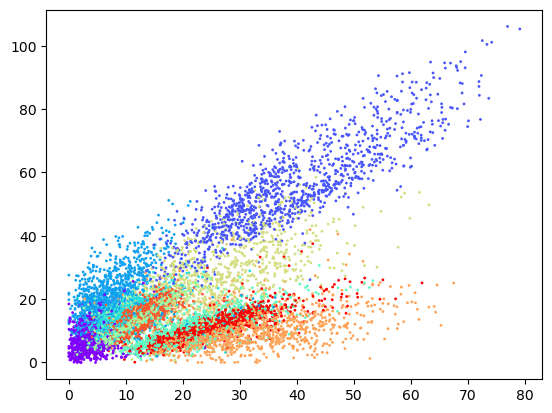

In [31]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,0], s=1, c=ytest, cmap='rainbow')
# plt.show()

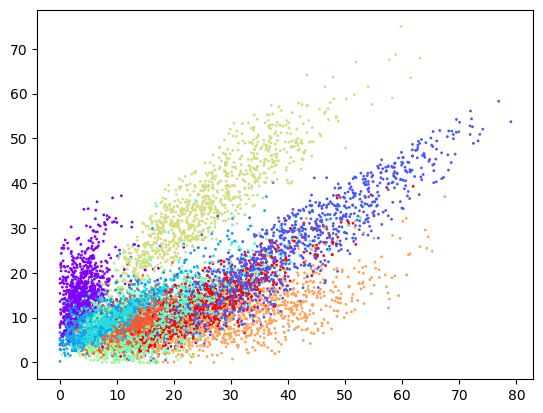

In [32]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,3], s=1, c=ytest, cmap='rainbow')
# plt.show()

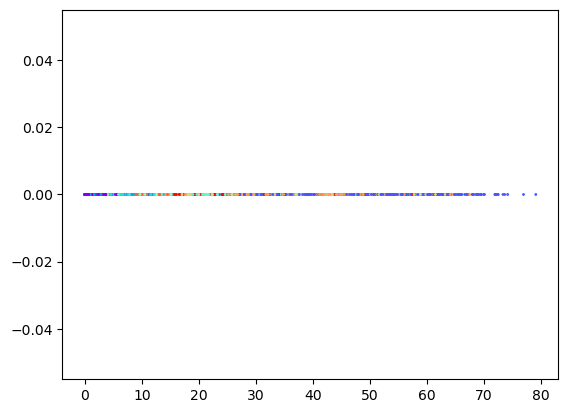

In [33]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,2], s=1, c=ytest, cmap='rainbow')
# plt.show()

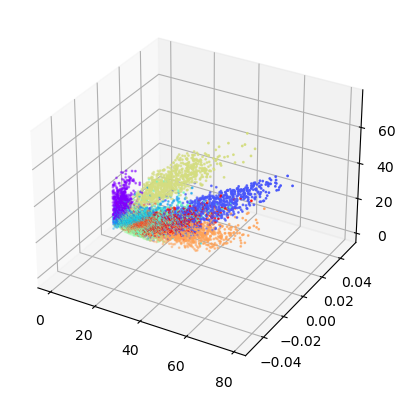

In [34]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(encoded_imgs[:,1], encoded_imgs[:,2], encoded_imgs[:,3], c=ytest, cmap='rainbow', s=1)

# Assignment


1. change the `encoding_dim` through various values (`range(2,18,2)` and store or keep track of the best loss you can get. Plot the 8 pairs of dimensions vs loss on a scatter plot


In [35]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

((60000, 784), (10000, 784))

In [38]:
dimensions = range(2,18,2)

In [46]:
losses = []
for encoding_dim in dimensions:
    
    encoding_dim = encoding_dim
    
    x = input_img = Input(shape=(784,))
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='relu')(x)

    x = Dense(128, activation='relu')(encoded)
    x = Dense(256, activation='relu')(x)
    decoded = Dense(784, activation='sigmoid')(x)

    autoencoder = Model(input_img, decoded)

    encoder = Model(input_img, encoded)

    encoded_input = Input(shape=(encoding_dim,))

    dcd1 = autoencoder.layers[-1]
    dcd2 = autoencoder.layers[-2]
    dcd3 = autoencoder.layers[-3]

    decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))
    
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
    autoencoder.fit(xtrain, xtrain,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest),
                callbacks=[TensorBoard(log_dir='/tmp/hmwk2')])   
    
    loss = autoencoder.evaluate(xtrain,xtrain,verbose=0)
    losses.append(loss)

Epoch 1/50


2022-11-19 18:37:49.628826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 0.2715

2022-11-19 18:37:52.202169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 3s 11ms/step - loss: 0.2715 - val_loss: 0.2278
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2215 - val_loss: 0.2131
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2099 - val_loss: 0.2056
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2022 - val_loss: 0.1981
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1959 - val_loss: 0.1935
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1924 - val_loss: 0.1908
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1900 - val_loss: 0.1893
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1882 - val_loss: 0.1873
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1865 - val_loss: 0.1857
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1854 - val_loss: 0.1851
Epoch 1

2022-11-19 18:39:44.180305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 0.2883

2022-11-19 18:39:46.682962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 3s 11ms/step - loss: 0.2883 - val_loss: 0.2502
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2460 - val_loss: 0.2397
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2106 - val_loss: 0.1912
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1856 - val_loss: 0.1820
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1799 - val_loss: 0.1782
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1765 - val_loss: 0.1755
Epoch 7/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1740 - val_loss: 0.1732
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1719 - val_loss: 0.1717
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1703 - val_loss: 0.1705
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1690 - val_loss: 0.1693
Epoch 11

2022-11-19 18:41:37.224172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 0.2440

2022-11-19 18:41:39.743493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 3s 11ms/step - loss: 0.2440 - val_loss: 0.1779
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1691 - val_loss: 0.1622
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1590 - val_loss: 0.1556
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1537 - val_loss: 0.1518
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1506 - val_loss: 0.1492
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1483 - val_loss: 0.1476
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1465 - val_loss: 0.1456
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1449 - val_loss: 0.1447
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1437 - val_loss: 0.1431
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1426 - val_loss: 0.1424
Epoch 11/

2022-11-19 18:43:27.577297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 0.2327

2022-11-19 18:43:30.076206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 3s 11ms/step - loss: 0.2327 - val_loss: 0.1654
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1523 - val_loss: 0.1424
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1391 - val_loss: 0.1343
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1335 - val_loss: 0.1309
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1300 - val_loss: 0.1278
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1275 - val_loss: 0.1255
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1254 - val_loss: 0.1243
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1237 - val_loss: 0.1230
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1223 - val_loss: 0.1213
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1211 - val_loss: 0.1201
Epoch 11

2022-11-19 18:45:19.787173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 0.2374

2022-11-19 18:45:22.416920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 3s 12ms/step - loss: 0.2374 - val_loss: 0.1610
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1508 - val_loss: 0.1423
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1399 - val_loss: 0.1354
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1346 - val_loss: 0.1315
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1312 - val_loss: 0.1287
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1284 - val_loss: 0.1266
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1263 - val_loss: 0.1247
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1247 - val_loss: 0.1232
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1233 - val_loss: 0.1220
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1221 - val_loss: 0.1208
Epoch 11/

2022-11-19 18:47:12.881691: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 0.2380

2022-11-19 18:47:15.391630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 3s 11ms/step - loss: 0.2380 - val_loss: 0.1635
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1506 - val_loss: 0.1405
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1372 - val_loss: 0.1315
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1283 - val_loss: 0.1266
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1237 - val_loss: 0.1209
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1207 - val_loss: 0.1185
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1186 - val_loss: 0.1166
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1168 - val_loss: 0.1150
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1153 - val_loss: 0.1139
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1141 - val_loss: 0.1128
Epoch 11/

2022-11-19 18:49:05.793149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 0.2245

2022-11-19 18:49:08.443643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 3s 12ms/step - loss: 0.2245 - val_loss: 0.1505
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1378 - val_loss: 0.1268
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1243 - val_loss: 0.1198
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1189 - val_loss: 0.1154
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1156 - val_loss: 0.1130
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1132 - val_loss: 0.1113
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1112 - val_loss: 0.1095
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1097 - val_loss: 0.1079
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1083 - val_loss: 0.1068
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1071 - val_loss: 0.1060
Epoc

2022-11-19 18:51:09.233953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 0.2310

2022-11-19 18:51:12.249998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 4s 13ms/step - loss: 0.2310 - val_loss: 0.1562
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1424 - val_loss: 0.1329
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1298 - val_loss: 0.1241
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1227 - val_loss: 0.1192
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1187 - val_loss: 0.1160
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1159 - val_loss: 0.1136
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1138 - val_loss: 0.1116
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1121 - val_loss: 0.1104
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1106 - val_loss: 0.1092
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1093 - val_loss: 0.1081


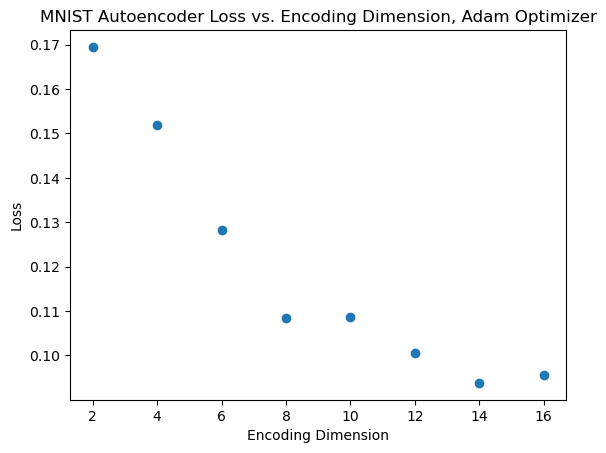

In [53]:
plt.scatter(dimensions,losses)
plt.ylabel('Loss')
plt.xlabel('Encoding Dimension')
plt.title('MNIST Autoencoder Loss vs. Encoding Dimension, Adam Optimizer')
plt.show()



2. **_After_** training an autoencoder with `encoding_dim=8`, apply noise (like the previous assignment) to *_only_* the input of the trained autoencoder (not the output). The output images should be without noise. 

Print a few noisy images along with the output images to show they don't have noise.

In [48]:
encoding_dim = 8
    
x = input_img = Input(shape=(784,))
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)

x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))

dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))
    
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
autoencoder.fit(xtrain, xtrain,
            epochs=50,
            batch_size=256,
            shuffle=True,
            validation_data=(xtest, xtest),
            callbacks=[TensorBoard(log_dir='/tmp/hmwk2')])

Epoch 1/50


2022-11-19 19:03:49.925361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 0.2349

2022-11-19 19:03:52.589516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 3s 12ms/step - loss: 0.2349 - val_loss: 0.1635
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1534 - val_loss: 0.1461
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1439 - val_loss: 0.1404
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1394 - val_loss: 0.1368
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1363 - val_loss: 0.1342
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1341 - val_loss: 0.1324
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1323 - val_loss: 0.1311
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1308 - val_loss: 0.1295
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1296 - val_loss: 0.1290
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1285 - val_loss: 0.1281
Epoch 

In [49]:
noise = np.random.normal(xtest)

In [50]:
encoded_imgs = encoder.predict(noise)
decoded_imgs = decoder.predict(encoded_imgs)

 93/313 [=======>......................] - ETA: 0s

2022-11-19 19:08:01.107245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


110/313 [=========>....................] - ETA: 0s

2022-11-19 19:08:01.707382: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step


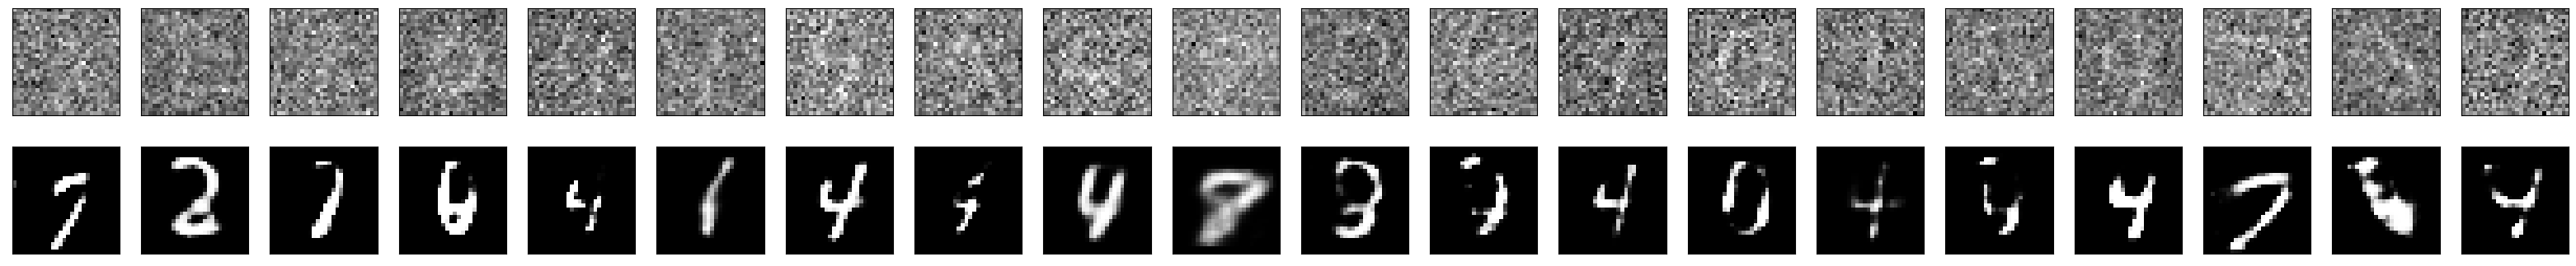

In [51]:
n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(noise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()